#Sales Data Analysis and Visualization

This is data from a clothes' shop where we analyze:
* Which category was sold most between belts, shoes and shirts
* How are the customrs buying habits? - how often do they visit the shop and time the visit the shop
* What is ext price and sku and how do they relate to the rest?

In [1]:
#Importing libraries, and the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://modcom.co.ke/datasets/sales.csv')
#reading the top 5 values in the dataset
df.head()

,name,sku,category,quantity,unit price,ext price,date
0,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1000 non-null   object 
 1   sku         1000 non-null   object 
 2   category    1000 non-null   object 
 3   quantity    1000 non-null   int64  
 4   unit price  1000 non-null   float64
 5   ext price   1000 non-null   float64
 6   date        1000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


from the above, we can see that we have no null values in our data. We can also see the different data types we have, from floats, integers and objects.

In [3]:
df.describe()

,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.00000
mean,10.328000,56.179630,579.84390
std,5.687597,25.331939,435.30381
min,1.000000,10.060000,10.38000
25%,5.750000,35.995000,232.60500
50%,10.000000,56.765000,471.72000
75%,15.000000,76.802500,878.13750
max,20.000000,99.970000,1994.80000


In accounting, an extended cost (ext price) is the unit cost multiplied by the number of those items that were purchased.

from the above, the maximum goods purchased at a specific time is 20 and minimum 1

the cheapest product is 10.06 while the most expensive is 99.97

the lowest purchase price was at 10.38 with the highest being at 1992.80

In [4]:
df.nunique()

name            20
sku             10
category         3
quantity        20
unit price     953
ext price      990
date          1000
dtype: int64

using the ***nunique()*** method to see how may values I have, this helps me determine what visualization to use.

In [5]:
df['sku'].unique()

array(['QN-82852', 'MJ-21460', 'AS-93055', 'GS-86623', 'LL-46261',
       'LW-86841', 'KV-99194', 'FK-71853', 'WJ-02096', 'VG-32047'],
      dtype=object)

In the field of inventory management, a stock keeping unit (SKU) is a distinct type of item for sale, such as a product or service, and all attributes associated with the item type that distinguish it from other item types. For a product, these attributes could include manufacturer, description, material, size, color, packaging, and warranty terms. When a business takes inventory of its stock, it counts the quantity it has of each SKU.

We have 10 different unique sku values in our sales

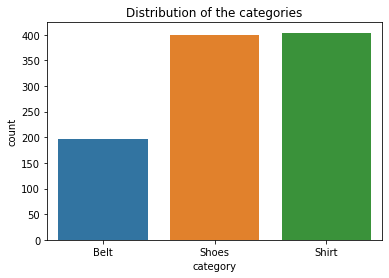

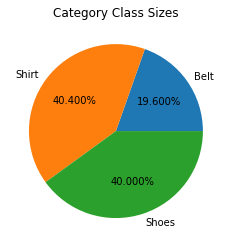

In [6]:
#Using countploat to visualize categorical data
sns.countplot(x='category', data=df);
plt.title('Distribution of the categories');

#using pie chart to visualize categorical data
x, y = plt.subplots()
df.groupby('category').size().plot(kind='pie', autopct='%3.3f%%')
y.set_title('Category Class Sizes')
y.set_xlabel('')
y.set_ylabel('')
plt.show()

from the above shoes and shirts were sold in almost equal quantity. Not many people 
buy belts though. Our assumption might be because one can use the same belt over a period of a number of years without needing any replacement

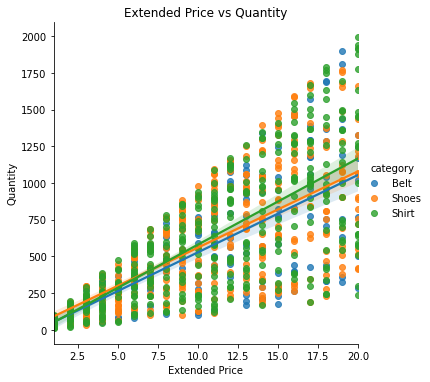

In [7]:
# correlation heatmap
sns.lmplot(x='quantity', y='ext price', data=df, fit_reg=True, hue='category')
plt.title('Extended Price vs Quantity')
plt.xlabel('Extended Price')
plt.ylabel('Quantity')
plt.show()

quantity and extnded price are correleated. An increase in Quantity leads to an increase in extended price and vice versa

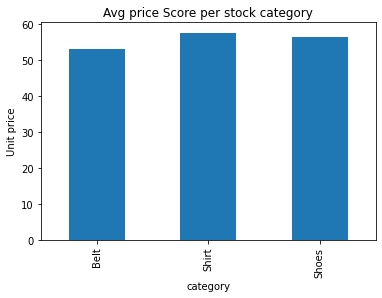

In [8]:
# bargraph
x, y = plt.subplots()
df.groupby('category')['unit price'].mean().plot(kind='bar')
y.set_title('Avg price Score per stock category')
y.set_xlabel('category')
y.set_ylabel('Unit price')
plt.show()

shirts are averagely most expensive than all the rest. Belts are the cheapest

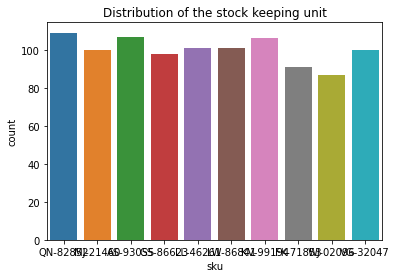

In [9]:
sns.countplot(x='sku', data=df);
plt.title('Distribution of the stock keeping unit');

from the above, we can see that we have ten unique sku, eqully distributes, with each having over 80 products.

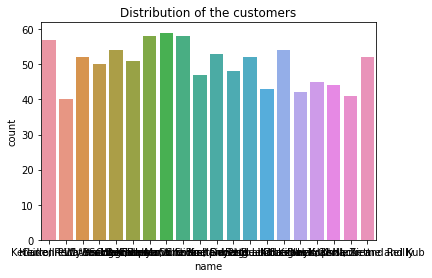

In [10]:
sns.countplot(x='name', data=df);
plt.title('Distribution of the customers');

most of the customers are repeat customers, with the lowest having shopped here 40 times and highest slightly below 60 times

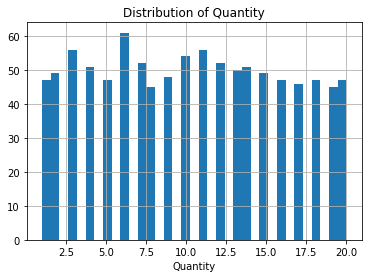

In [11]:
#histogram ro review numerical, caegorical data
df.hist('quantity', bins=35);
plt.title('Distribution of Quantity');
plt.xlabel('Quantity');


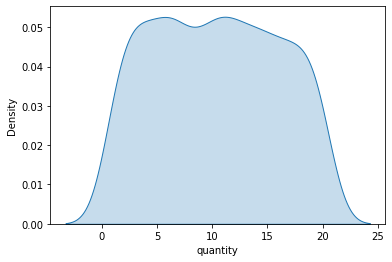

In [12]:
#  a smooth estimate of the distribution of quantity using a kernel density estimation
quant = df['quantity']
sns.kdeplot(data=quant, shade=True)

the general distribution of quantity is at 10 items in a purchase

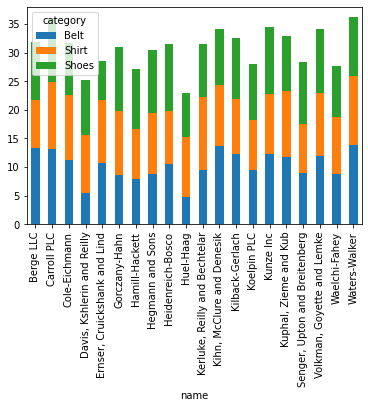

In [13]:
#stacked bar graph
df.groupby(['name','category'])['quantity'].mean().unstack().plot(kind='bar', stacked  =True)
y.set_title('Avg quantity bought by a customer and the category type')
y.set_xlabel('quantity')
y.set_ylabel('customer names')
plt.show()

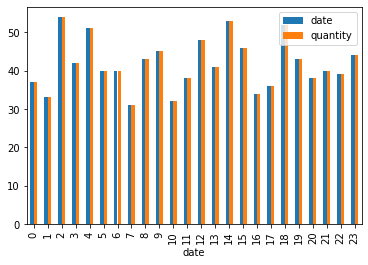

In [14]:
#importing numeric python
import numpy as np

#convert date to readable datetime
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

#visualizing quantity of items bought per hour on average in a given day
time = df[['date', 'quantity']]
res = time.groupby(time["date"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
plt.show()

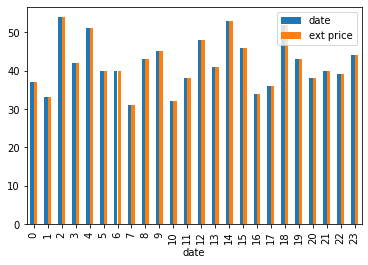

In [15]:
#visualizing total cost of items bought per hour on average in a given day
time = df[['date', 'ext price']]
res = time.groupby(time["date"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
plt.show()

this is a pretty much 24-hour shop

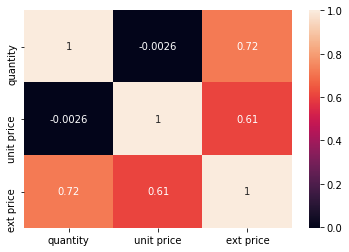

In [16]:
#correration between different values
sns.heatmap(df.corr(), annot=True)

all values are correlated. Unit price, extended price and quantity affect each other.

unit price * quantity = ext price